In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df_train=pd.read_csv('IntClasses/MinMax/train_Int_MM_PCA10.csv')
df_valid=pd.read_csv('IntClasses/MinMax/valid_Int_MM_PCA10.csv')
df_test=pd.read_csv('IntClasses/MinMax/test_Int_MM_PCA10.csv')

In [2]:
accuracy_scores = []


X_train_orig = df_train.iloc[:, :-1]
y_train_orig = df_train.iloc[:, -1]
X_test_orig = df_test.iloc[:, :-1]
y_test_orig = df_test.iloc[:, -1]

k=3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train_orig, y_train_orig)


y_pred = knn.predict(X_test_orig)


cm = confusion_matrix(y_test_orig, y_pred)
acc = accuracy_score(y_test_orig, y_pred)
precision = precision_score(y_test_orig, y_pred)
recall = recall_score(y_test_orig, y_pred)
f1 = f1_score(y_test_orig, y_pred)


print(f"K={k}")  
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")


accuracy_scores.append(acc)

K=3
Confusion Matrix:
[[2645  399]
 [ 645  311]]
Accuracy: 0.7390, Precision: 0.4380, Recall: 0.3253, F1-score: 0.3733



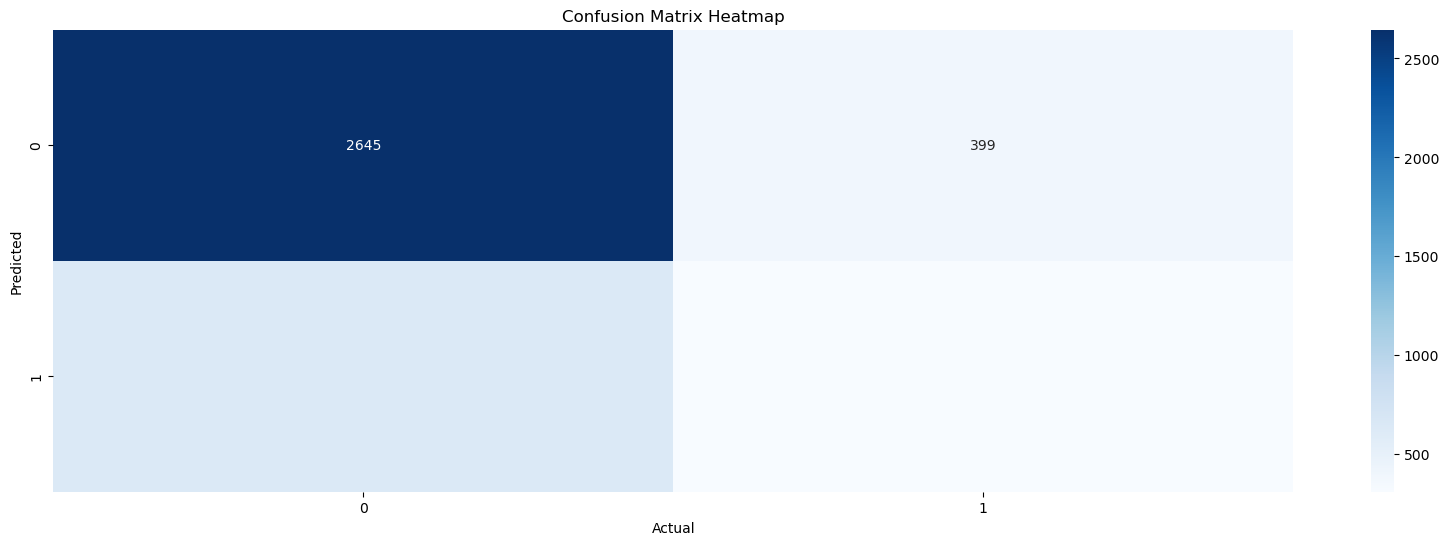

In [3]:
plt.figure(figsize=(20,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')     
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [4]:
df_train=pd.read_csv('IntClasses/MinMax/train_Int_MM_PCA20.csv')
df_valid=pd.read_csv('IntClasses/MinMax/valid_Int_MM_PCA20.csv')
df_test=pd.read_csv('IntClasses/MinMax/test_Int_MM_PCA20.csv')

In [5]:
accuracy_scores = []


X_train_orig = df_train.iloc[:, :-1]
y_train_orig = df_train.iloc[:, -1]
X_test_orig = df_test.iloc[:, :-1]
y_test_orig = df_test.iloc[:, -1]

k=7
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train_orig, y_train_orig)


y_pred = knn.predict(X_test_orig)


cm = confusion_matrix(y_test_orig, y_pred)
acc = accuracy_score(y_test_orig, y_pred)
precision = precision_score(y_test_orig, y_pred)
recall = recall_score(y_test_orig, y_pred)
f1 = f1_score(y_test_orig, y_pred)


print(f"K={k}")  
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")


accuracy_scores.append(acc)

K=7
Confusion Matrix:
[[2970   74]
 [ 466  490]]
Accuracy: 0.8650, Precision: 0.8688, Recall: 0.5126, F1-score: 0.6447



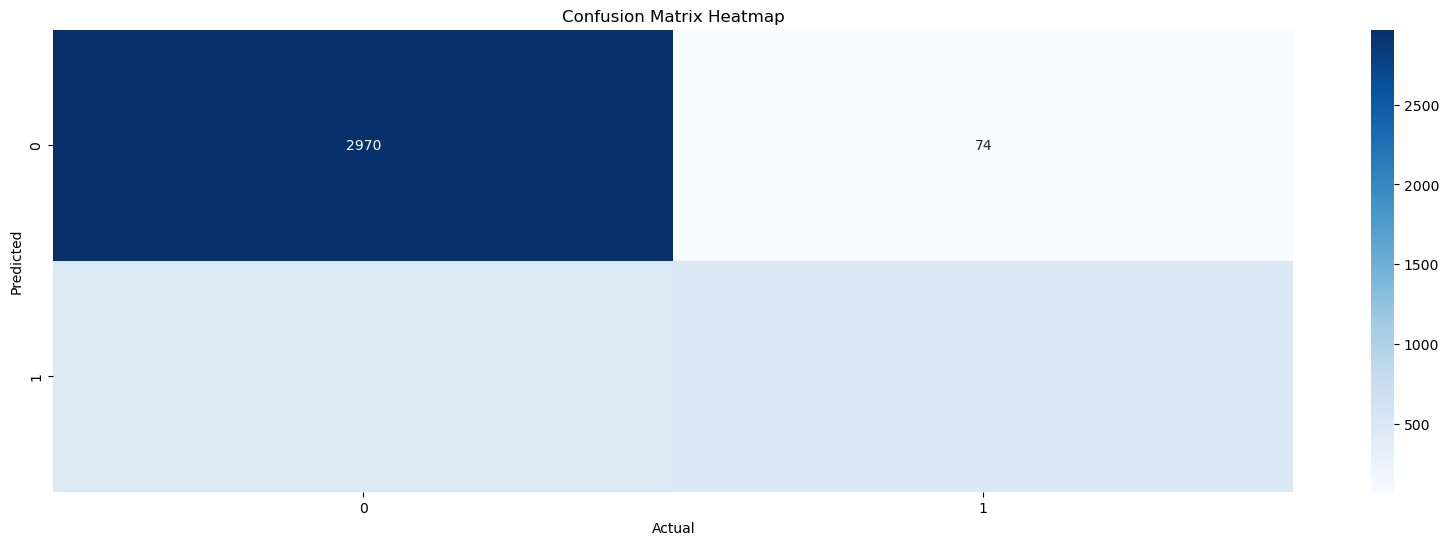

In [6]:
plt.figure(figsize=(20,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')     
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [7]:
df_train=pd.read_csv('IntClasses/MinMax/train_Int_MM_PCA25.csv')
df_valid=pd.read_csv('IntClasses/MinMax/valid_Int_MM_PCA25.csv')
df_test=pd.read_csv('IntClasses/MinMax/test_Int_MM_PCA25.csv')

In [8]:
accuracy_scores = []


X_train_orig = df_train.iloc[:, :-1]
y_train_orig = df_train.iloc[:, -1]
X_test_orig = df_test.iloc[:, :-1]
y_test_orig = df_test.iloc[:, -1]

k=3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train_orig, y_train_orig)


y_pred = knn.predict(X_test_orig)


cm = confusion_matrix(y_test_orig, y_pred)
acc = accuracy_score(y_test_orig, y_pred)
precision = precision_score(y_test_orig, y_pred)
recall = recall_score(y_test_orig, y_pred)
f1 = f1_score(y_test_orig, y_pred)


print(f"K={k}")  
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")


accuracy_scores.append(acc)

K=3
Confusion Matrix:
[[2937  107]
 [ 367  589]]
Accuracy: 0.8815, Precision: 0.8463, Recall: 0.6161, F1-score: 0.7131



In [9]:
best_k = 0
best_score = 0
accuracy_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_orig, y_train_orig, cv=5, scoring='accuracy')
    avg_score = scores.mean()
    accuracy_scores.append(avg_score)
    
    if avg_score > best_score:
        best_score = avg_score
        best_k = k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_orig, y_train_orig)
y_pred = knn.predict(X_test_orig)

cm = confusion_matrix(y_test_orig, y_pred)
acc = accuracy_score(y_test_orig, y_pred)
precision = precision_score(y_test_orig, y_pred, average='binary')  
recall = recall_score(y_test_orig, y_pred, average='binary')
f1 = f1_score(y_test_orig, y_pred, average='binary')

print(f"Best k: {best_k} with CV accuracy: {best_score:.4f}")
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")


Best k: 5 with CV accuracy: 0.8868
Confusion Matrix:
[[2987   57]
 [ 403  553]]
Accuracy: 0.8850, Precision: 0.9066, Recall: 0.5785, F1-score: 0.7063



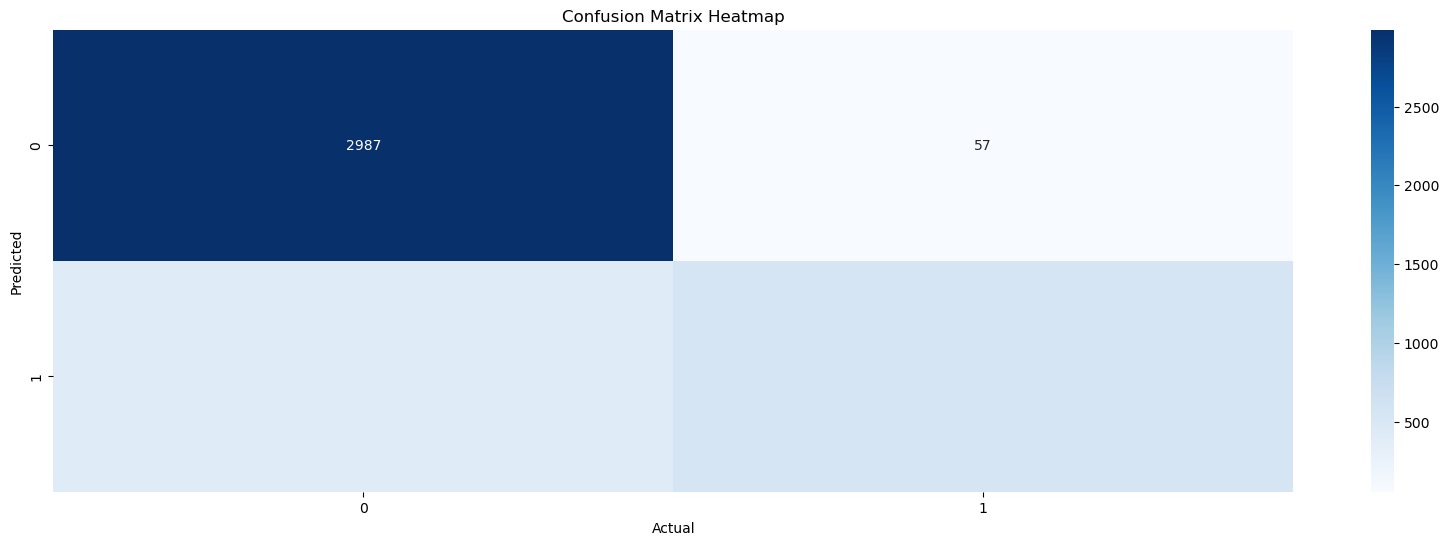

In [10]:
plt.figure(figsize=(20,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')     
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()